In [8]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import os


In [9]:
import sys 
print(sys.executable)

/home/amaithi/anaconda3/envs/ml_ops/bin/python


In [10]:
def data_load(path):
    df = pd.read_csv(path)
    return df 
    
    

In [11]:
data = data_load(os.path.join("../dataset_raw", "banking.csv"))
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,blue-collar,married,basic.4y,unknown,yes,no,cellular,aug,thu,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
1,53,technician,married,unknown,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,management,single,university.degree,no,yes,no,cellular,jun,thu,...,3,6,2,success,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,services,married,high.school,no,no,no,cellular,apr,fri,...,2,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,retired,married,basic.4y,no,yes,no,cellular,aug,fri,...,1,3,1,success,-2.9,92.201,-31.4,0.869,5076.2,1


In [12]:
def visualize_missing_values(data):
    print("Missing Values\n")
    print(data.shape)
    print(100*(data.isna().sum())/len(data))

visualize_missing_values(data)


Missing Values

(41188, 21)
age               0.0
job               0.0
marital           0.0
education         0.0
default           0.0
housing           0.0
loan              0.0
contact           0.0
month             0.0
day_of_week       0.0
duration          0.0
campaign          0.0
pdays             0.0
previous          0.0
poutcome          0.0
emp_var_rate      0.0
cons_price_idx    0.0
cons_conf_idx     0.0
euribor3m         0.0
nr_employed       0.0
y                 0.0
dtype: float64


In [13]:
def drop_missing_values(data):
    data = data.dropna()
    print("After deleting missing values")
    visualize_missing_values(data)
    return data 

df1 = drop_missing_values(data)

    

After deleting missing values
Missing Values

(41188, 21)
age               0.0
job               0.0
marital           0.0
education         0.0
default           0.0
housing           0.0
loan              0.0
contact           0.0
month             0.0
day_of_week       0.0
duration          0.0
campaign          0.0
pdays             0.0
previous          0.0
poutcome          0.0
emp_var_rate      0.0
cons_price_idx    0.0
cons_conf_idx     0.0
euribor3m         0.0
nr_employed       0.0
y                 0.0
dtype: float64


In [14]:
categorical_cols = []
numerical_cols = []

def column_collector(data):
    for col in data.columns:
        if data[col].dtype == 'O':
            categorical_cols.append(col)
        else:
            numerical_cols.append(col)
    print(categorical_cols, end='\n')
    print(numerical_cols, end='\n')

column_collector(df1)


['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']
['age', 'duration', 'campaign', 'pdays', 'previous', 'emp_var_rate', 'cons_price_idx', 'cons_conf_idx', 'euribor3m', 'nr_employed', 'y']


In [15]:
for col in categorical_cols:
    print(f"Column Name : {col}\t")
    print(df1[col].unique(), end='\n\n')


Column Name : job	
['blue-collar' 'technician' 'management' 'services' 'retired' 'admin.'
 'housemaid' 'unemployed' 'entrepreneur' 'self-employed' 'unknown'
 'student']

Column Name : marital	
['married' 'single' 'divorced' 'unknown']

Column Name : education	
['basic.4y' 'unknown' 'university.degree' 'high.school' 'basic.9y'
 'professional.course' 'basic.6y' 'illiterate']

Column Name : default	
['unknown' 'no' 'yes']

Column Name : housing	
['yes' 'no' 'unknown']

Column Name : loan	
['no' 'yes' 'unknown']

Column Name : contact	
['cellular' 'telephone']

Column Name : month	
['aug' 'nov' 'jun' 'apr' 'jul' 'may' 'oct' 'mar' 'sep' 'dec']

Column Name : day_of_week	
['thu' 'fri' 'tue' 'mon' 'wed']

Column Name : poutcome	
['nonexistent' 'success' 'failure']



In [17]:
def preprocessing(data):
    data['education']=np.where(data['education'] == 'basic.4y', "Basic", data['education'])
    data['education']=np.where(data['education'] == 'basic.6y', "Basic", data['education'])
    data['education']=np.where(data['education'] == 'basic.9y', "Basic", data['education'])

    for var in categorical_cols:
        cat_list = 'var'+'_'+var
        cat_list = pd.get_dummies(data[var], prefix=var)
        data1 = data.join(cat_list)
        data = data1
    data_vars=data.columns.values.tolist()
    to_keep = [i for i in data_vars if i not in categorical_cols]

    final_data = data[to_keep]

    final_data.columns = final_data.columns.str.replace('-', '_')
    final_data.columns = final_data.columns.str.replace(' ', '_')

    return final_data




In [18]:
cleaned_data = preprocessing(df1)

------------------- EDA Done ----------------

In [20]:
def train_and_test_split(data):
    from sklearn.model_selection import train_test_split 
    X = data.loc[:, data.columns != 'y']
    y = data.loc[:, data.columns == 'y']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify= y, random_state=45)

    return X_train, X_test, y_train, y_test

In [21]:
def over_sampling_target_clss(X_train, y_train):
    # Over Sampling using SMOTE 

    from imblearn.over_sampling import SMOTE 
    os = SMOTE(random_state=0)

    columns = X_train.columns
    os_data_X, os_data_y = os.fit_resample(X_train, y_train)

    os_data_X = pd.DataFrame(data=os_data_X, columns=columns)
    os_data_y = pd.DataFrame(data = os_data_y, columns= ['y'])

    # Check the numbers of data 

    print("Length of the oversampled data is ", len(os_data_X), end='\n')
    print("Number of no subscription in oversampled data is ", len(os_data_y[os_data_y['y']==0]), end='\n')
    print("Number of subscription ", len(os_data_y[os_data_y['y']==1]), end='\n')
    print("Proportion of no subscription data in oversampled data is ",len(os_data_y[os_data_y['y']==0])/len(os_data_X))
    print("Proportion of subscription data in oversampled data is ",len(os_data_y[os_data_y['y']==1])/len(os_data_X))

    X_train = os_data_X 
    y_train = os_data_y['y']

    return X_train, y_train
    
        

In [22]:
def train_basic_classifier(X_train, y_train):
    from sklearn.ensemble import RandomForestClassifier
    model = RandomForestClassifier(n_estimators=100)
    model.fit(X_train, y_train)

    return model 


In [23]:
def predict_on_test_data(model, x_test):
    pred = model.predict(x_test)
    return pred 
    

In [24]:
def predict_prob_on_test_data(model, x_test):
    y_pred = model.predict_proba(x_test)
    return y_pred 

In [25]:
def get_metrics(y_true, y_pred, y_pred_prob):
    from sklearn.metrics import accuracy_score, precision_score, recall_score, log_loss
    
    acc = accuracy_score(y_true=y_true, y_pred=y_pred)
    prec = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    entropy = log_loss(y_true, y_pred_prob)

    return {'accuracy': round(acc, 2), 'precision': round(prec, 2), 'recall': round(recall, 2), 'entropy': round(entropy, 2)}

In [38]:
def create_roc_auc_plot(clf, x_data, y_data):
    import matplotlib.pyplot as plt
    from sklearn.metrics import RocCurveDisplay
    RocCurveDisplay.from_estimator(clf, x_data, y_data)
    plt.savefig('roc_auc_curve.png')

In [41]:
def create_confusion_matric(clf, x_test, y_test):
    import matplotlib.pyplot as plt 
    from sklearn.metrics import ConfusionMatrixDisplay
    ConfusionMatrixDisplay.from_estimator(clf, x_test, y_test)
    plt.savefig('confusion_matrrix.png')
    

In [28]:
def hyper_parameter_tuning(X_train, y_train):
    # define random parameters grid
    n_estimators = [5,21,51,101] # number of trees in the random forest
    max_features = ['auto', 'sqrt'] # number of features in consideration at every split
    max_depth = [int(x) for x in np.linspace(10, 120, num = 12)] # maximum number of levels allowed in each decision tree
    min_samples_split = [2, 6, 10] # minimum sample number to split a node
    min_samples_leaf = [1, 3, 4] # minimum sample number that can be stored in a leaf node
    bootstrap = [True, False] # method used to sample data points

    random_grid = {'n_estimators': n_estimators,
                    'max_features': max_features,
                    'max_depth': max_depth,
                    'min_samples_split': min_samples_split,
                    'min_samples_leaf': min_samples_leaf,
                    'bootstrap': bootstrap
                  }
    
    from sklearn.model_selection import RandomizedSearchCV
    from sklearn.ensemble import RandomForestClassifier
    classifier = RandomForestClassifier()
    model_tuning = RandomizedSearchCV(estimator = classifier, param_distributions = random_grid,
                   n_iter = 100, cv = 5, verbose=2, random_state=35, n_jobs = -1)
    model_tuning.fit(X_train, y_train)

    print ('Random grid: ', random_grid, '\n')
    # print the best parameters
    print ('Best Parameters: ', model_tuning.best_params_, ' \n')

    best_params = model_tuning.best_params_
    
    n_estimators = best_params['n_estimators']
    min_samples_split = best_params['min_samples_split']
    min_samples_leaf = best_params['min_samples_leaf']
    max_features = best_params['max_features']
    max_depth = best_params['max_depth']
    bootstrap = best_params['bootstrap']
    
    model_tuned = RandomForestClassifier(n_estimators = n_estimators, min_samples_split = min_samples_split,
                                         min_samples_leaf= min_samples_leaf, max_features = max_features,
                                         max_depth= max_depth, bootstrap=bootstrap) 
    model_tuned.fit( X_train, y_train)
    return model_tuned,best_params

----------------------------------------------Model Building and Hyper Parameter Tuning-------------------

In [29]:
X_train, X_test, y_train, y_test = train_and_test_split(cleaned_data)

In [30]:
X_train, y_train = over_sampling_target_clss(X_train, y_train)

Length of the oversampled data is  51166
Number of no subscription in oversampled data is  25583
Number of subscription  25583
Proportion of no subscription data in oversampled data is  0.5
Proportion of subscription data in oversampled data is  0.5


In [31]:
basic_model = train_basic_classifier(X_train, y_train)

In [32]:
pred = predict_on_test_data(basic_model, X_test)

In [33]:
pred_prob = predict_prob_on_test_data(basic_model, X_test)

In [35]:
get_metrics(y_test, pred, pred_prob)

{'accuracy': 0.91, 'precision': 0.63, 'recall': 0.53, 'entropy': 0.2}

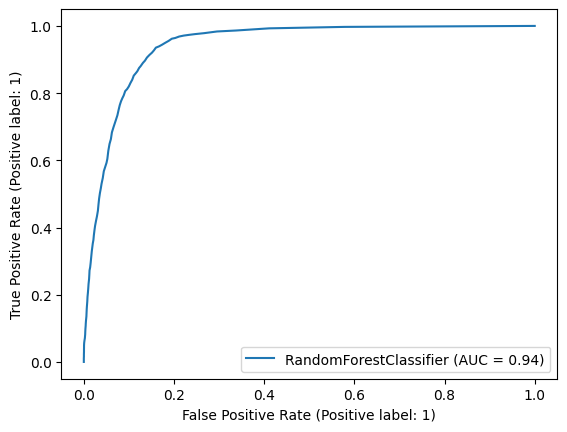

In [39]:
create_roc_auc_plot(basic_model, X_test, y_test)

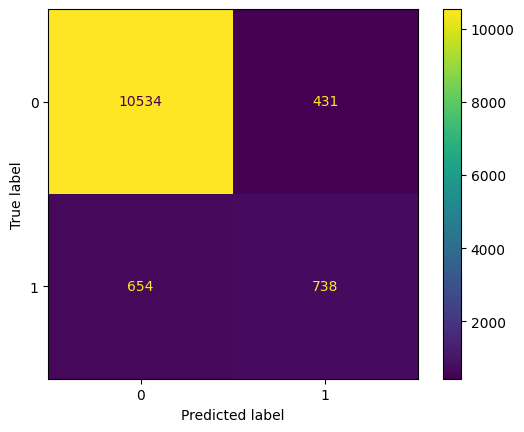

In [42]:
create_confusion_matric(basic_model, X_test, y_test)